In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
# Memuat tabel data
df = pd.read_excel("/content/Data_1.xlsx")
df.head()

,No,Wisata,Kategori,Lokasi,Tarif,Rating,Experience
0,1,Monumen Nasional,Budaya,Jakarta,15000,4.6,Edukasi
1,2,Monumen Nasional,Budaya,Jakarta,35000,4.6,Adrenalin
2,3,Monumen Nasional,Budaya,Jakarta,0,4.6,Relaksasi
3,4,Kota Tua,Budaya,jakarta,100000,4.6,Kuliner
4,5,Kota Tua,Budaya,Jakarta,50000,4.6,Fotografi


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019 entries, 0 to 1018
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   No          1019 non-null   int64  
 1   Wisata      1019 non-null   object 
 2   Kategori    1019 non-null   object 
 3   Lokasi      1019 non-null   object 
 4   Tarif       1019 non-null   int64  
 5   Rating      1019 non-null   float64
 6   Experience  1018 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 55.9+ KB


In [4]:
df.isna().sum()

,0
No,0
Wisata,0
Kategori,0
Lokasi,0
Tarif,0
Rating,0
Experience,1


In [5]:
# Memeriksa duplikasi pada data
print("Jumlah duplikasi: ", df.duplicated().sum())

# menampilkan ringkasan parameter statistik pada data
df.describe()

Jumlah duplikasi:  0


,No,Tarif,Rating
count,1019.000000,1.019000e+03,1019.000000
mean,510.000000,5.182679e+04,4.440334
std,294.304264,1.180683e+05,0.209762
min,1.000000,0.000000e+00,3.400000
25%,255.500000,5.000000e+03,4.300000
50%,510.000000,2.000000e+04,4.500000
75%,764.500000,5.000000e+04,4.600000
max,1019.000000,2.000000e+06,5.000000


In [6]:
# menghapus kolom yang tidak relevan
df.drop(columns=['No'], inplace=True)

In [7]:
# Menggunakan One-Hot Encoding untuk kolom "Lokasi" dan "Kategori"
df = pd.get_dummies(df, columns=['Lokasi', 'Kategori', 'Experience'], dtype=int)

In [8]:
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Melakukan normalisasi pada kolom Tarif dan Rating
df[['Tarif', 'Rating']] = scaler.fit_transform(df[['Tarif', 'Rating']])

In [9]:
print(df.columns)

Index(['Wisata', 'Tarif', 'Rating', 'Lokasi_Bandung', 'Lokasi_Jakarta',
       'Lokasi_Semarang', 'Lokasi_Surabaya', 'Lokasi_Yogyakarta',
       'Lokasi_jakarta', 'Kategori_Bahari', 'Kategori_Budaya',
       'Kategori_Cagar Alam', 'Kategori_Pusat Perbelanjaan',
       'Kategori_Taman Hiburan', 'Kategori_Tempat Ibadah',
       'Experience_Adrenalin', 'Experience_Aktivitas Air',
       'Experience_Astronomi', 'Experience_Belanja', 'Experience_Bertani',
       'Experience_Camping', 'Experience_Edukasi', 'Experience_Fotografi',
       'Experience_Hiking', 'Experience_Kuliner', 'Experience_Memancing',
       'Experience_Olahraga', 'Experience_Piknik', 'Experience_Relaksasi',
       'Experience_Seni', 'Experience_Spiritualitas'],
      dtype='object')


In [10]:
# Memisahkan fitur dan target
X = df[['Tarif', 'Rating', 'Lokasi_Bandung', 'Lokasi_Jakarta',
       'Lokasi_Semarang', 'Lokasi_Surabaya', 'Lokasi_Yogyakarta',
       'Lokasi_jakarta', 'Kategori_Bahari', 'Kategori_Budaya',
       'Kategori_Cagar Alam', 'Kategori_Pusat Perbelanjaan',
       'Kategori_Taman Hiburan', 'Kategori_Tempat Ibadah',
       'Experience_Adrenalin', 'Experience_Aktivitas Air',
       'Experience_Astronomi', 'Experience_Belanja', 'Experience_Bertani',
       'Experience_Camping', 'Experience_Edukasi', 'Experience_Fotografi',
       'Experience_Hiking', 'Experience_Kuliner', 'Experience_Memancing',
       'Experience_Olahraga', 'Experience_Piknik', 'Experience_Relaksasi',
       'Experience_Seni', 'Experience_Spiritualitas']]

# Encode target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Wisata'])

In [11]:
# Manual oversampling
from imblearn.over_sampling import SMOTE

minority_class = df[df['Wisata'] == 'Nama_Label_Minority']
df = pd.concat([df, minority_class] * 2, axis=0)

X = df.drop(columns=['Wisata'])
y = label_encoder.fit_transform(df['Wisata'])

# Inisialisasi SMOTE
smote = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

In [12]:
# Membagi data menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan hasil pembagian data
print("Jumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))

Jumlah data training: 1630
Jumlah data testing: 408


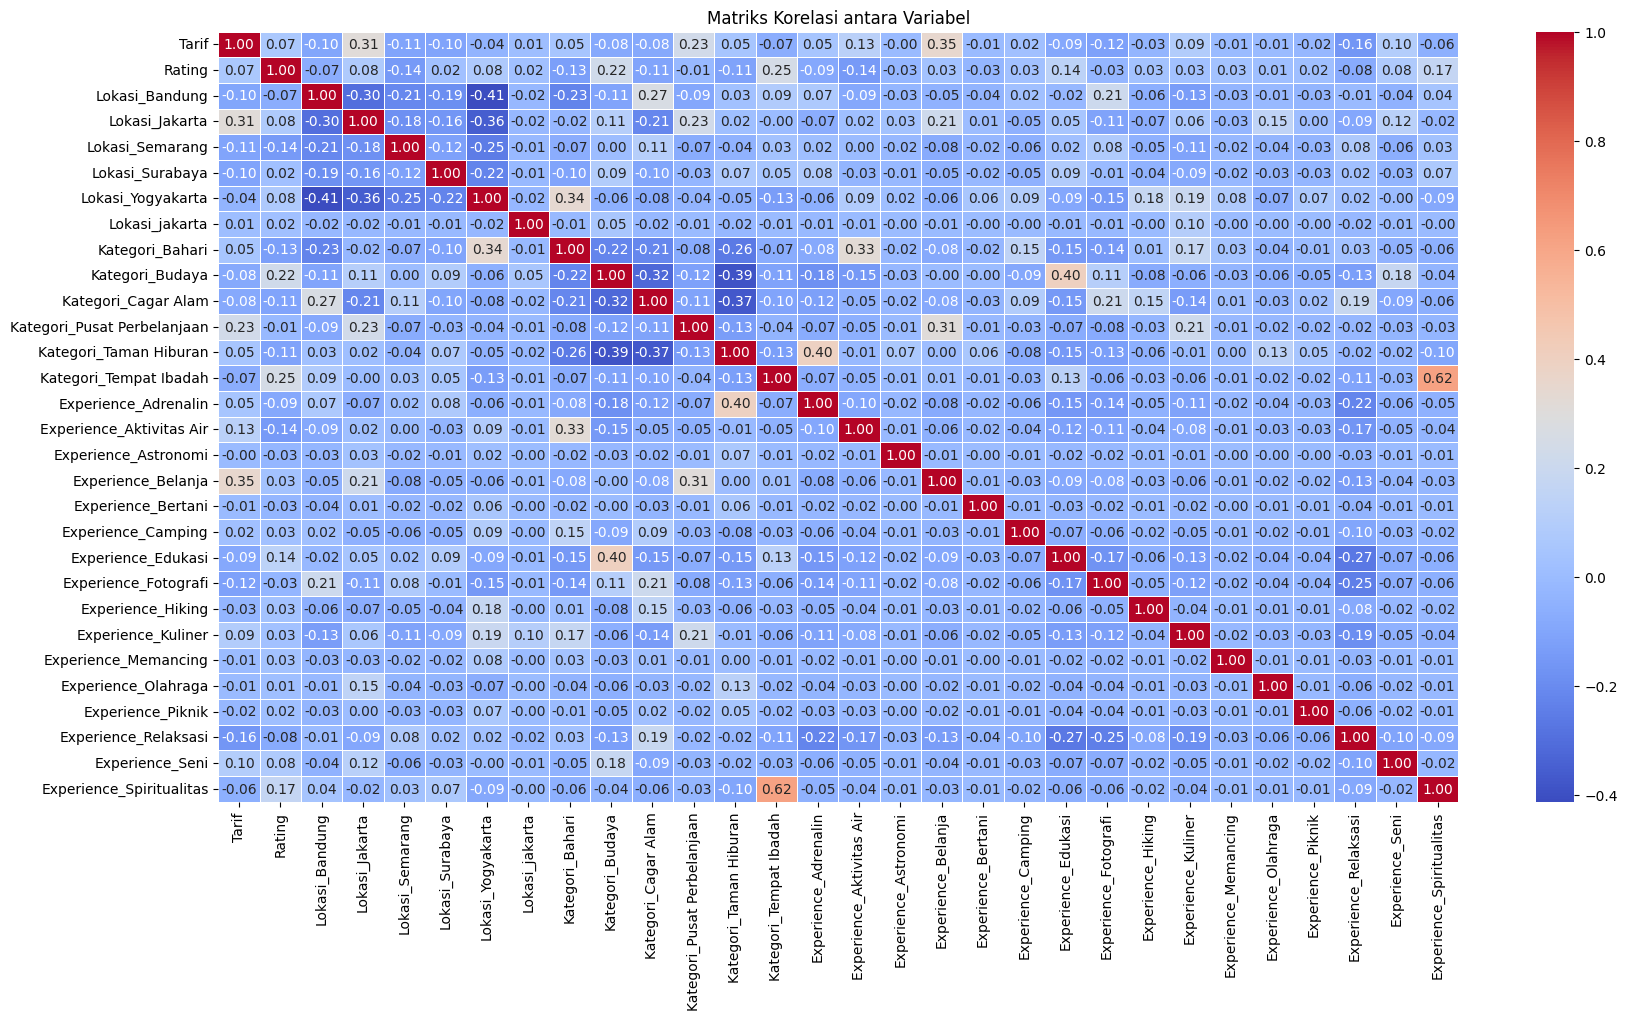

In [13]:
# Menghitung korelasi antara kolom
corr_matrix = X.corr()

# Membuat heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Menambahkan judul
plt.title('Matriks Korelasi antara Variabel')

# Menampilkan heatmap
plt.show()

In [14]:
# Mengubah data menjadi tensor
train_dataset = tf.data.Dataset.from_tensor_slices((X_train.values, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test.values, y_test))

# Mengatur batch size untuk data pipeline
train_dataset = train_dataset.batch(16)
test_dataset = test_dataset.batch(16)

# Menampilkan beberapa batch contoh
for features, labels in train_dataset.take(1):
    print("Fitur batch:\n", features)
    print("Label batch:\n", labels)

Fitur batch:
 tf.Tensor(
[[0.0075 0.5    0.     0.     0.     0.     1.     0.     0.     0.
  0.     0.     1.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     1.     0.     0.    ]
 [0.005  0.625  0.     1.     0.     0.     0.     0.     0.     1.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     1.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.0375 0.75   0.     0.     0.     0.     1.     0.     0.     0.
  1.     0.     0.     0.     0.     0.     0.     0.     0.     1.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.0025 0.6875 1.     0.     0.     0.     0.     0.     0.     1.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     1.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.025  0.625  1.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     1.     0.     1.     0.     0.     0.     0.     0.
  0

In [15]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

In [16]:
input_dim = X_train.values.shape[1]

In [17]:
# Membuat model
model = models.Sequential()
model.add(layers.InputLayer(shape=(input_dim,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(945, activation='softmax'))

In [18]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           7,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 945)                 │          61,425 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,513 (431.69 KB)

 Trainable params: 110,513 (431.69 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(
    X_train.values, y_train,
    validation_data=(X_test, y_test),
    epochs=500,
    batch_size=32,
)

Epoch 1/500
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.0025 - loss: 6.8394 - val_accuracy: 0.0025 - val_loss: 6.6386
Epoch 2/500
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0065 - loss: 6.3461 - val_accuracy: 0.0025 - val_loss: 6.2221
Epoch 3/500
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0107 - loss: 5.7531 - val_accuracy: 0.0074 - val_loss: 5.7759
Epoch 4/500
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0232 - loss: 5.1345 - val_accuracy: 0.0147 - val_loss: 5.2417
Epoch 5/500
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0405 - loss: 4.6670 - val_accuracy: 0.0172 - val_loss: 4.8151
Epoch 6/500
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0585 - loss: 4.3527 - val_accuracy: 0.0221 - val_loss: 4.4897
Epoch 7/500
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0622 - loss: 4.0781 - val_accuracy: 0.0270 - val_loss: 4.2629
Epoch 8/500
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0685 - loss: 3.9070 - val_accuracy: 0.0319 -

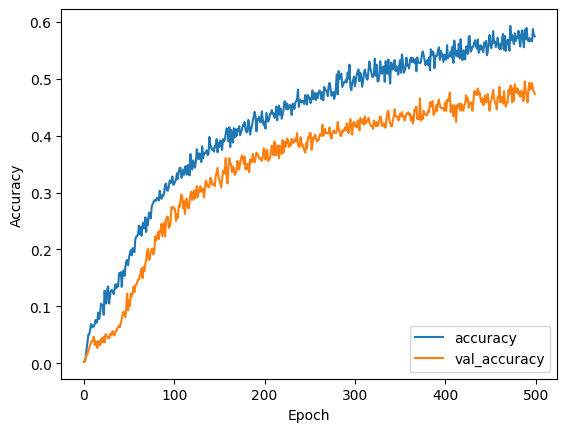

In [21]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [22]:
# Evaluasi
test_loss, test_accuracy = model.evaluate(X_test.values, y_test, verbose=2)
print("Final Train Accuracy:", history.history['accuracy'][-1])
print("Final Validation Accuracy:", history.history['val_accuracy'][-1])

13/13 - 0s - 3ms/step - accuracy: 0.4730 - loss: 2.6242
Final Train Accuracy: 0.5742331147193909
Final Validation Accuracy: 0.4730392098426819


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


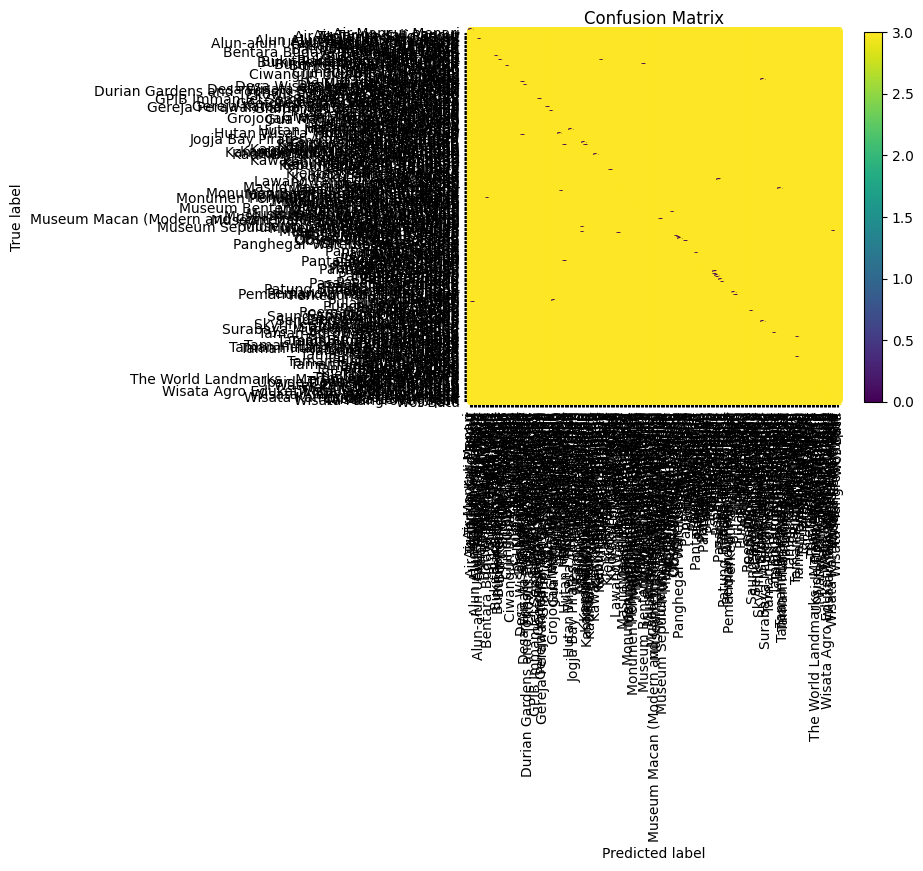

In [23]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_classes = model.predict(X_test).argmax(axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_classes, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.inverse_transform(np.unique(y_test)))
disp.plot(cmap='viridis', xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()

In [27]:
def find_matching_wisata(lokasi, kategori, pengalaman, tarif, rating, tolerance_tarif=0.1, tolerance_rating=0.05):
    # Normalisasi tarif dan rating
    tarif_normalized = scaler.transform([[tarif, 0]])[0][0]
    rating_normalized = scaler.transform([[0, rating]])[0][1]

    # Toleransi untuk tarif dan rating
    tarif_min = tarif_normalized - tolerance_tarif
    tarif_max = tarif_normalized + tolerance_tarif
    rating_min = rating_normalized - tolerance_rating
    rating_max = rating_normalized + tolerance_rating

    # Filter data berdasarkan fitur yang sesuai
    filtered_df = df[
        (df[f"Lokasi_{lokasi}"] == 1) &
        (df[f"Kategori_{kategori}"] == 1) &
        (df[f"Experience_{pengalaman}"] == 1) &
        (df["Tarif"].between(tarif_min, tarif_max)) &
        (df["Rating"].between(rating_min, rating_max))
    ]

    matching_wisata = filtered_df['Wisata'].tolist()

    return matching_wisata

# Interaksi input dengan pengguna
print("Klasifikasi Tempat Wisata")
lokasi_input = input("Masukkan lokasi: ")
kategori_input = input("Masukkan kategori: ")
pengalaman_input = input("Masukkan pengalaman: ")
tarif_input = float(input("Masukkan tarif: "))
rating_input_str = input("Masukkan rating: ").replace(",", ".")
rating_input = float(rating_input_str)

# Mencari tempat wisata yang sesuai
matching_wisata = find_matching_wisata(
    lokasi=lokasi_input,
    kategori=kategori_input,
    pengalaman=pengalaman_input,
    tarif=tarif_input,
    rating=rating_input
)

# Menampilkan hasil
if matching_wisata:
    print("\nNama tempat wisata yang memiliki fitur yang sama:")
    for i, nama in enumerate(matching_wisata, start=1):
        print(f"{i}. {nama}")
else:
    print("\nTidak ditemukan tempat wisata yang memiliki fitur yang sama.")

Klasifikasi Tempat Wisata
Masukkan lokasi: Yogyakarta
Masukkan kategori: Bahari
Masukkan pengalaman: Relaksasi
Masukkan tarif: 5000
Masukkan rating: 4.6

Nama tempat wisata yang memiliki fitur yang sama:
1. Pantai Ngobaran
2. Pantai Siung
3. Pantai Sadranan
4. Pantai Jungwok
5. Pantai Greweng
6. Pantai Watu Kodok
7. Pantai Kesirat
8. Pantai Ngobaran
9. Pantai Siung
10. Pantai Sadranan
11. Pantai Jungwok
12. Pantai Greweng
13. Pantai Watu Kodok
14. Pantai Kesirat


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [25]:
  # Classification report
from sklearn.metrics import classification_report

present_classes = np.unique(y_test)
target_names = label_encoder.inverse_transform(present_classes)

report = classification_report(y_test, y_pred_classes, labels=present_classes, target_names=target_names)
print("Classification Report:\n", report)

Classification Report:
                                                          precision    recall  f1-score   support

                                      Air Mancur Menari       0.00      0.00      0.00         1
                                 Air Terjun Kali Pancur       1.00      1.00      1.00         2
                                Air Terjun Kedung Pedut       1.00      1.00      1.00         1
                                  Air Terjun Sri Gethuk       0.25      1.00      0.40         1
                                     Alive Museum Ancol       1.00      1.00      1.00         1
                           Alun Alun Selatan Yogyakarta       1.00      1.00      1.00         1
                                 Alun-Alun Kota Bandung       1.00      1.00      1.00         1
                     Alun-alun Utara Keraton Yogyakarta       1.00      0.50      0.67         2
                                      Amazing Art World       1.00      1.00      1.00         2
     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

Saved artifact at '/tmp/tmpk0_d1xpw'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 30), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 945), dtype=tf.float32, name=None)
Captures:
  136909671019296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136909684745040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136909684725840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136909684726720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136909684733936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136909684932672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136909684941648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136909684939536: TensorSpec(shape=(), dtype=tf.resource, name=None)
